In [1]:
from PIL import Image
from matplotlib import cm
import cv2
from os import path
import os
import torch
import numpy as np
import torchvision
import matplotlib.pyplot as plt
import time
import copy

from torchvision import transforms, models

In [6]:
data_root = 'd:\\ustluga'
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [4]:
model = torch.load("ustluga_cam6_resnet18_1346-04092020.pt")

Wall time: 1.72 s


array([0.01039047], dtype=float32)

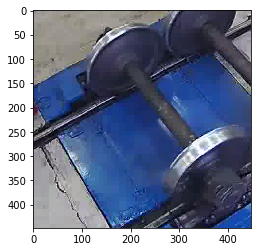

In [7]:
%%time
test_img = cv2.imread(path.join(data_root,'test\\camera60683.png'))
pil_im = Image.fromarray(test_img)
inp = val_transforms(pil_im).view(1,3,224,224)
inp.shape
inp = inp.to(device)
preds = model(inp)
plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))
torch.nn.functional.softmax(preds, dim=1)[:,1].data.cpu().numpy()